<a href="https://colab.research.google.com/github/riyadbinislam/Data_Visualization_with_Python__mh/blob/main/audi_used_car_analysis/audi_used_car_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries and Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [ ]:
df = pd.read_csv("audi.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB


Pie chart - Model

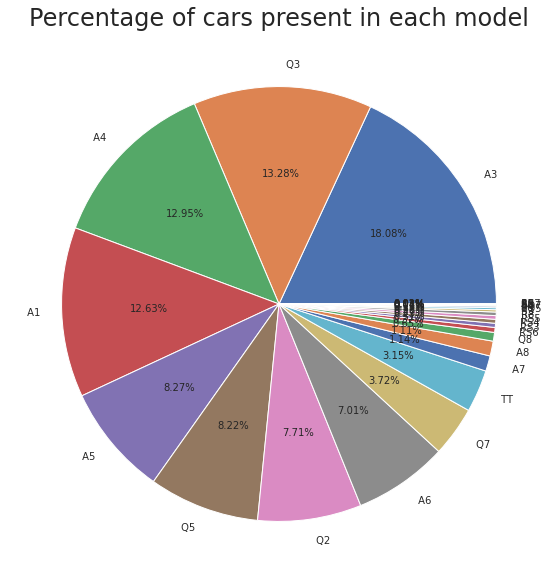

In [ ]:
df['model'].value_counts().plot(kind="pie",
                                autopct='%1.2f%%',
                                textprops = {'fontsize':10})
plt.title("Percentage of cars present in each model")
plt.ylabel("")
plt.show()

Bar Plot - Model

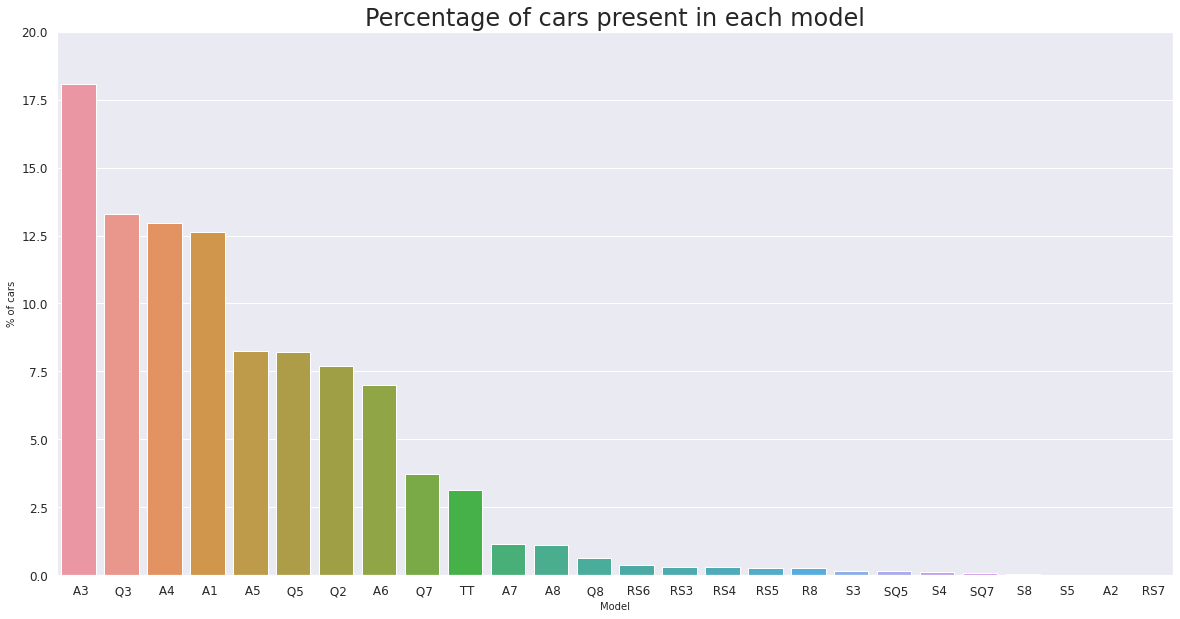

In [ ]:
df_model = pd.DataFrame(df["model"].value_counts())
df_model = df_model.reset_index()
df_model = df_model.rename(columns={"index":"model",
                                    "model":"no_of_cars"})
df_model["% of cars"] = (df_model["no_of_cars"]/df.shape[0])*100
sns.barplot(x="model",
            y="% of cars",
            data=df_model)
plt.yticks(np.arange(0,21,2.5))
plt.xlabel("Model")
plt.ylabel("% of cars")
plt.title("Percentage of cars present in each model")
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

**Comparison between pie chart and barplot**

In this case, the **barplot** is **better than** the **piechart**. Because,

1.   the pie chart is not suitable for these many models unlike the barplot
2.   it is almost impossible to identify the percentage of most car models and labels from the pie chart whereas the features are distinguishable from the barplot